The implementation of Naive Bayes and Logistic Regression is supposed to be from scratch.

# Naive Bayes (50)

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} {P(x_1, \dots, x_n)}$

$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$

$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$

$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)\end{aligned}\end{align}$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. 

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs are not to be taken too seriously.

In [462]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
np.random.seed(123)

### Dataset
Load the given dataset. The last column contains the labels. 

Preprocess if needed.

In [465]:
data = np.loadtxt('data.txt', delimiter=' ', usecols=range(-1))
labels = data[:, -1]
data = data[:, :-1]
print("Data:")
print(data)
print()
print("Labels:")
print(labels)

Data:
[[ 0.10635  0.12803]
 [ 0.02403 -0.07484]
 [ 0.02237  0.01745]
 ...
 [-0.15642  0.08101]
 [-0.02797 -0.00697]
 [ 0.0743  -0.09015]]

Labels:
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1

Consider the values of each class. Create a dictionary for the dataset, with classes as keys and the entries of the dataset as values.

In [468]:
def create_class_dictionary(data, labels):
    class_dictionary = {}
    unique_classes = np.unique(labels)    
    for class_label in unique_classes:
        class_indices = np.where(labels == class_label)[0]
        class_entries = data[class_indices]
        class_dictionary[class_label] = class_entries
    return class_dictionary

For the dataset dictionary, find the mean and standard deviation of all classes. The output format should be a list of two lists, the first one the mean and standard deviation of the first column and the second one is for the second column.

In [469]:
def info(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return mean, std

In [470]:
def class_info(class_dictionary):
    class_stats = []
    for class_label, class_data in class_dictionary.items():
        class_mean, class_std = info(class_data)
        print('class mean:', class_mean)
        print('class std:', class_std)
        class_stats.append([class_mean, class_std])
    return class_stats

### Visualization
Use the imported libraries to visualize the given data. 

Why is the info step valid in this dataset? 

What is the type of this dataset's distribution? With other distribution types, what action would be needed to obtain the mean and standard variation info?

In [473]:
def plot_class_info(class_stats):
    num_features = len(class_stats[0][0])    
    fig, ax = plt.subplots(num_features, 2, figsize=(12, 8))
    for i in range(num_features):
        for j, (class_mean, class_std) in enumerate(class_stats):
            ax[i, 0].bar(j, class_mean[i], yerr=class_std[i], align='center', alpha=0.5)
            ax[i, 0].set_xticks(range(len(class_stats)))
            ax[i, 0].set_xticklabels(range(1, len(class_stats) + 1))
            ax[i, 0].set_ylabel('Mean')            
            ax[i, 1].bar(j, class_std[i], align='center', alpha=0.5)
            ax[i, 1].set_xticks(range(len(class_stats)))
            ax[i, 1].set_xticklabels(range(1, len(class_stats) + 1))
            ax[i, 1].set_ylabel('Standard Deviation')
    plt.xlabel('Class')
    plt.tight_layout()
    plt.show()

class mean: [-0.00586012  0.00192934]
class std: [0.09924148 0.10099018]
class mean: [-0.00174086  0.00417055]
class std: [0.10214804 0.1087157 ]


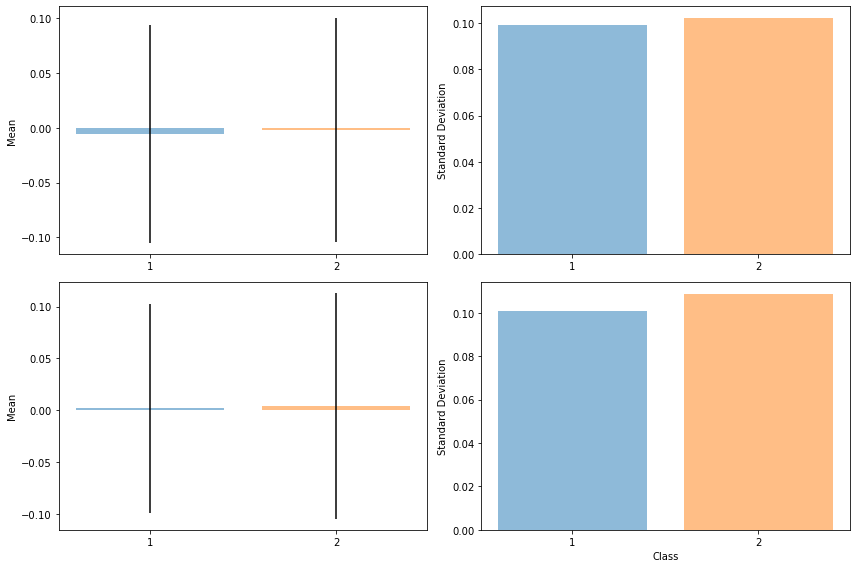

In [474]:
class_dict = create_class_dictionary(data, labels)
class_stats = class_info(class_dict)
plot_class_info(class_stats)

### Model Details

As explained above, to create this model, you need a prior function and a likelihood function.

In the likelihood function, you need to calculate the probability of the query belonging to a class. 

In [475]:
def prior(class_dictionary, labels):
    prior_probabilities = {}
    total_samples = len(labels)
    for class_label, class_count in class_dictionary.items():
        prior_probabilities[class_label] = class_count / total_samples
    return prior_probabilities

In [476]:
def likelihood(class_dictionary, query):
    likelihood_probabilities = {}
    for class_label, class_entire in class_dictionary.items():
        likelihood_probabilities[class_label] = 1.0
        try:
            total_samples = sum(class_dictionary.values())
            for feature_value, feature_count in query.items():
                likelihood_probabilities[class_label] *= (feature_count / class_entire)
            likelihood_probabilities[class_label] *= (class_entire / total_samples)
        except:
            pass
    return likelihood_probabilities

### Predict


In [477]:
def predict(data, labels, query):
    class_dictionary = create_class_dictionary(data, labels)
    prior_probabilities = prior(class_dictionary, labels)
    likelihood_probabilities = likelihood(class_dictionary, query)
    predicted_class = None
    max_posterior_probability = float('-inf')
    for class_label, prior_prob in prior_probabilities.items():
        likelihood_prob = likelihood_probabilities[class_label]
        posterior_prob = prior_prob.any() * likelihood_prob
        if posterior_prob > max_posterior_probability:
            max_posterior_probability = posterior_prob
            predicted_class = class_label
    return predicted_class

In [478]:
def NB(data, labels, queries):
    predictions = []
    for query in queries:
        prediction = predict(data, labels, query)
        predictions.append(prediction)
    return predictions

### Test
To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import GaussianNB from sklearn and compare your model's result with it.

In [7]:
# ! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [479]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

def my_train_test_split(data, labels, test_size):
    return train_test_split(data, labels, test_size=test_size)

In [480]:
def accuracy(ground_truth, predictions):
    correct = sum(ground_truth == predictions)
    total = len(ground_truth)
    accuracy = correct / total
    return accuracy

In [482]:
X_train, X_test, y_train, y_test = my_train_test_split(data, labels, test_size=0.2)
naive_bayes_predictions = NB(X_train, y_train, X_test)
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
sklearn_predictions = gaussian_nb.predict(X_test)
accuracy_naive_bayes = accuracy(y_test, naive_bayes_predictions)
accuracy_sklearn = accuracy(y_test, sklearn_predictions)
print("Naive Bayes Model Accuracy:", accuracy_naive_bayes)
print("GaussianNB Accuracy:", accuracy_sklearn)

Naive Bayes Model Accuracy: 0.54
GaussianNB Accuracy: 0.565


# Linear Regression (35)

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Ordinary least squares Linear Regression.

LinearRegression from sklearn.linear_model fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In this section, you will implement a simple linear regression model using sklearn. Only the first feature of the diabetes dataset is required for this part.

In [483]:
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model

In [484]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, 2]

Split the data into training and testing sets.

In [485]:
X_train, X_test, y_train, y_test = my_train_test_split(diabetes_X, diabetes_y, test_size=0.2)

Create the model using sklearn. Then train it using the training set.

In [486]:
model = linear_model.LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

Make predictions for the test set.

In [487]:
predictions = model.predict(X_test.reshape(-1, 1))

Visualize your predictions and compare them to ground truth using the imported libraries.

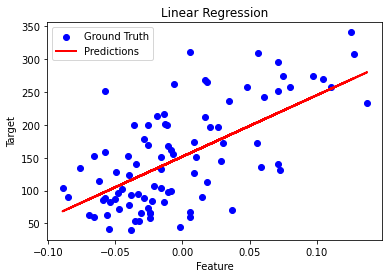

In [488]:
plt.scatter(X_test, y_test, color='blue', label='Ground Truth')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Logistic Regression (15 + 50)

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

$S(h(x)) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_1 x_2 + \cdots + \theta_n x_n})} = \frac{1}{1 + e^{-\theta^T x}} \tag{2}$

The sigmoid function is of importance here and is defined as:

$S(x) = \frac{1}{1 + e^{-x}}$






Calculate the sigmoid function and visualize it.

In [489]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

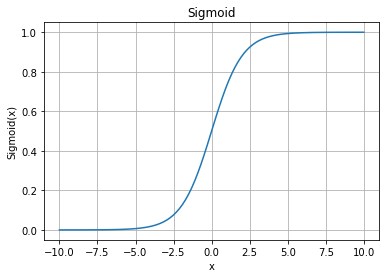

In [490]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid')
plt.grid(True)
plt.show()

#Dataset
Load the given dataset (same as naive bayes). Add a new column at the end of the dataset containing only 1s.

In [491]:
new_data = pd.read_csv('data.txt')
new_data[1] = 1
print(new_data)

       0.10635 0.12803 0  1
0     0.02403 -0.07484 1  1
1      0.02237 0.01745 0  1
2    -0.13465 -0.23444 0  1
3     0.09612 -0.04661 0  1
4     -0.00237 0.20299 1  1
..                   ... ..
994     0.0983 0.02622 1  1
995   0.17402 -0.16422 0  1
996   -0.15642 0.08101 0  1
997  -0.02797 -0.00697 0  1
998    0.0743 -0.09015 1  1

[999 rows x 2 columns]


### Predictions

Simply implement the math above to make predictions. Since we are using numbers here, define the threshold of 0.5 for classification.

In [492]:
def predict(weights, x):
    z = np.dot(weights, x)
    probability = sigmoid(z)
    return 1 if probability >= 0.5 else 0

### Loss Function
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

In binary classification, where the number of classes M
 equals 2, cross-entropy can be calculated as:

$−(ylog(p)+(1−y)log(1−p))$


In [493]:
def cross_entropy(y_true, y_pred):
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

### Gradient Descent

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent in machine learning is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

$\theta := \theta - \alpha \nabla_\theta H \tag{6}$

In [494]:
def gradient_descent(X, y, weights, num_of_epochs, learning_rate=0.005):
    m = len(X)
    cost_history = []
    for epoch in range(num_of_epochs):
        y_pred = np.dot(X, weights)
        gradient = (1/m) * np.dot(X.T, (y_pred - y))
        weights = weights - learning_rate * gradient
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)
    return weights, cost_history

In [495]:
def LR(train_set, labels, test_set, num_of_epochs=100, learning_rate=0.005):
    weights = np.zeros(train_set.shape[1])
    weights, _ = gradient_descent(train_set, labels, weights, num_of_epochs, learning_rate)
    predictions = []
    for instance in test_set:
        prediction = predict(weights, instance)
        predictions.append(prediction)
    return predictions

### Test

To test the model, import a suitable dataset from sklearn library to check the accuracy of your model. Then import LogisticRegression from sklearn and compare your model's result with it.



In [496]:
def accuracy(ground_truth, predictions):
    correct = sum(ground_truth == predictions)
    total = len(ground_truth)
    accuracy = correct / total
    return accuracy

In [498]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = my_train_test_split(data, labels, test_size=0.2)
my_lr_predictions = LR(X_train, y_train, X_test)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
sklearn_predictions = lr_model.predict(X_test)
model_accuracy = accuracy(y_test, sklearn_predictions)
lr_accuracy = accuracy(y_test, my_lr_predictions)
print(model_accuracy)
print(lr_accuracy)

0.49
0.47


### Visualization

During your model's training, save the accuracy and loss of each epoch, and then plot them using the imported libraries. Explain the pattern. If the result is not satisfactory, change the learning rate, num of epochs, initial weights, etc and observe their effects on the result.

In [499]:
def plot_metrics(accuracies, losses):
    epochs = range(1, len(accuracies) + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracies)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(epochs, losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.tight_layout()
    plt.show()

Epoch 1: Accuracy = 0.48, Loss = 0.24
Epoch 2: Accuracy = 0.52, Loss = 0.23999994410153613
Epoch 3: Accuracy = 0.48, Loss = 0.23999988820910292
Epoch 4: Accuracy = 0.52, Loss = 0.23999983232269975
Epoch 5: Accuracy = 0.48, Loss = 0.23999977644232598
Epoch 6: Accuracy = 0.48, Loss = 0.23999972056798094
Epoch 7: Accuracy = 0.52, Loss = 0.239999664699664
Epoch 8: Accuracy = 0.48, Loss = 0.23999960883737445
Epoch 9: Accuracy = 0.48, Loss = 0.23999955298111167
Epoch 10: Accuracy = 0.52, Loss = 0.23999949713087507
Epoch 11: Accuracy = 0.48, Loss = 0.23999944128666392
Epoch 12: Accuracy = 0.48, Loss = 0.2399993854484776
Epoch 13: Accuracy = 0.48, Loss = 0.2399993296163155
Epoch 14: Accuracy = 0.52, Loss = 0.23999927379017685
Epoch 15: Accuracy = 0.48, Loss = 0.23999921797006118
Epoch 16: Accuracy = 0.48, Loss = 0.23999916215596767
Epoch 17: Accuracy = 0.48, Loss = 0.23999910634789576
Epoch 18: Accuracy = 0.52, Loss = 0.23999905054584478
Epoch 19: Accuracy = 0.52, Loss = 0.23999899474981404
Ep

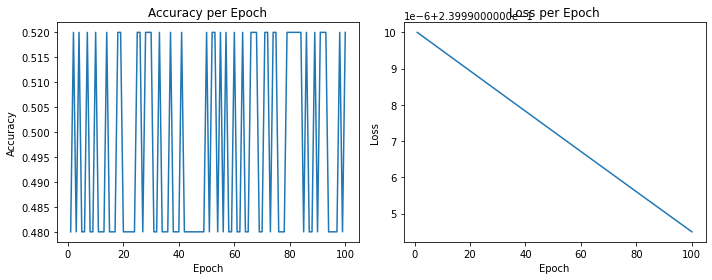

In [500]:
X_train, X_test, y_train, y_test = my_train_test_split(data, labels, test_size=0.2)
weights = np.zeros(X_train.shape[1])
learning_rate = 0.005
num_of_epochs = 100

accuracies = []
losses = []
for epoch in range(num_of_epochs):
    weights, loss = gradient_descent(X_train, y_train, weights, 1, learning_rate)
    predictions = []
    prediction = predict(weights, X_test[epoch])
    predictions.append(prediction)
    accuracy_val = accuracy(y_test, predictions)
    accuracies.append(accuracy_val)
    losses.append(loss[0]) 

    print(f"Epoch {epoch + 1}: Accuracy = {accuracy_val}, Loss = {loss[0]}")

plot_metrics(accuracies, losses)
